# Pandas Essentials
This workshop is about learning by practice and application

## Learning Outcomes
1. Introduction to data structures
   * Series
   * DataFrame
   * Panel
2. Getting started
   * Essential basic functionality
   * Indexing & selecting data
   * Computational tools
   * Working with missing data
3. Data loading
   * Input / Output
4. Data wrangling
   * Merge, join & concatenate
5. Plotting & visualisation
6. Examples

Ensure you have [pandas-datareader](https://github.com/pydata/pandas-datareader) installed. If not use pip

`$ pip install pandas-datareader`

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

**Download** the stock data from `yahoo`. **[Learning Outcomes - I/O]**

In [2]:
dat = web.DataReader(["AAPL", "AMZN", "GLD", "IWM", "SPY", "VXX"],
                     "yahoo",
                      start=datetime.datetime(2007, 1, 1), 
                      end=datetime.datetime(2010, 1, 1))

In [3]:
dat

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 6 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2007-01-03 00:00:00 to 2009-12-31 00:00:00
Minor_axis axis: AAPL to VXX

Note that this is a panel, a 3D structure within pandas. 

The dimensions are 6 Items axis (Open, high, low...) x 316 Major axis (# of days of stock data) x 6 minor axis (AAPL, AMZN,...). 

Pandas provides 3 core types of data structure - `Series, DataFrame and Panel`. **[Learning Outcomes - Data Structure]**

In [4]:
# Save the data in csv format for future use
for o in dat.minor_axis:
    fname = "data/" + o + ".csv"
    dat[:,:,o].to_csv(fname)

In [5]:
# or in excel format
for o in dat.minor_axis:
    fname = "data/" + o + ".xlsx"
    dat[:,:,o].to_excel(fname)

In [6]:
aapl = dat[:,:,"AAPL"]

This is called **slicing**. `:` means select all data. We chose to retain all the data for the `Items` and `Major` axis and select only `AAPL` for the `Minor axis`.

In [7]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,86.289999,86.579999,81.899999,83.800002,309579900.0,11.019520
2007-01-04,84.050001,85.949998,83.820003,85.659998,211815100.0,11.264106
2007-01-05,85.770000,86.199997,84.400002,85.049997,208685400.0,11.183892
2007-01-08,85.959998,86.529998,85.280003,85.470000,199276700.0,11.239121
2007-01-09,86.450003,92.979999,85.150000,92.570003,837324600.0,12.172756


In [8]:
type(aapl)

pandas.core.frame.DataFrame

Note that this is a pandas 2D `DataFrame`.

In [9]:
aapl_adj_close = aapl['Adj Close'][:200] 
# selecting only the first 200 data points for analysis

In [10]:
aapl_adj_close.tail()

Date
2007-10-11    21.332897
2007-10-12    21.993015
2007-10-15    21.957512
2007-10-16    22.299405
2007-10-17    22.716254
Name: Adj Close, dtype: float64

In [11]:
type(aapl_adj_close)

pandas.core.series.Series

In [12]:
# 50-d moving average
mavg = aapl_adj_close.rolling(window=50, center=False).mean()
mstd = aapl_adj_close.rolling(window=20).std()
mavg[-5:]

Date
2007-10-11    18.425768
2007-10-12    18.506666
2007-10-15    18.599056
2007-10-16    18.689342
2007-10-17    18.788544
Name: Adj Close, dtype: float64

## Plotting & Visualisation

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

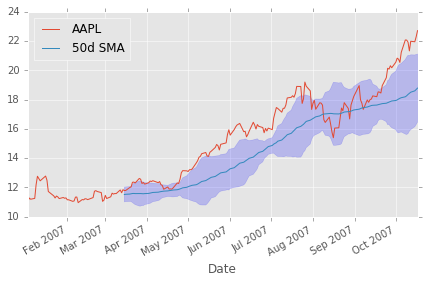

In [14]:
aapl_adj_close.plot(legend = True, label="AAPL")
mavg.plot(legend = True, label='50d SMA')
plt.fill_between(mstd.index, mavg-2*mstd, mavg+2*mstd, color='b', alpha=0.2)
plt.tight_layout()

Note that this is a pandas 1D `Series`.

In [15]:
dat_slice = dat["Adj Close", :, :]

In [16]:
dat_slice[:3]

,AAPL,AMZN,GLD,IWM,SPY,VXX
Date,,,,,,
2007-01-03,11.019520,38.700001,62.279999,68.699667,116.673075,NaN
2007-01-04,11.264106,38.900002,61.650002,68.884248,116.920669,NaN
2007-01-05,11.183892,38.369999,60.169998,67.442751,115.988072,NaN


In [17]:
dat_slice.columns 
# Access columns attributes

Index([u'AAPL', u'AMZN', u'GLD', u'IWM', u'SPY', u'VXX'], dtype='object')

In [18]:
dat_slice.index[:5]
# Access rows or index attributes

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

##  Computational Tools & Descriptive Statistics

In [19]:
dat_change = dat_slice.pct_change()

In [20]:
dat_change[:2]

,AAPL,AMZN,GLD,IWM,SPY,VXX
Date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.005168,-0.010116,0.002687,0.002122,NaN


In [21]:
dat_change['AAPL'].mean()

0.0016223225025544163

In [22]:
dat_change['AAPL'].dropna().describe()

count    755.000000
mean       0.001622
std        0.028237
min       -0.179195
25%       -0.012666
50%        0.001791
75%        0.017366
max        0.139050
Name: AAPL, dtype: float64

In [23]:
dat_change['AAPL'][dat_change['AAPL'].idxmin()]

-0.17919522674231181

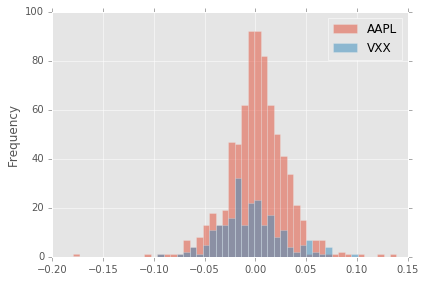

In [24]:
plt.figure();
dat_change[['AAPL','VXX']].plot.hist(bins = 50, alpha=0.5)
plt.tight_layout()

In [25]:
correls = dat_change.rolling(window=50).corr(other=dat_change, pairwise=True)
correls

<class 'pandas.core.panel.Panel'>
Dimensions: 756 (items) x 6 (major_axis) x 6 (minor_axis)
Items axis: 2007-01-03 00:00:00 to 2009-12-31 00:00:00
Major_axis axis: AAPL to VXX
Minor_axis axis: AAPL to VXX

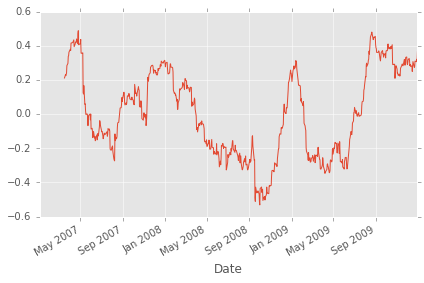

In [26]:
correls[:,"AAPL","GLD"].plot()
plt.tight_layout()

In [27]:
correls[:,"GLD",:].T[:3]

,AAPL,AMZN,GLD,IWM,SPY,VXX
Date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
correls[:,"GLD",:].T[:3].dropna()

,AAPL,AMZN,GLD,IWM,SPY,VXX
Date,,,,,,


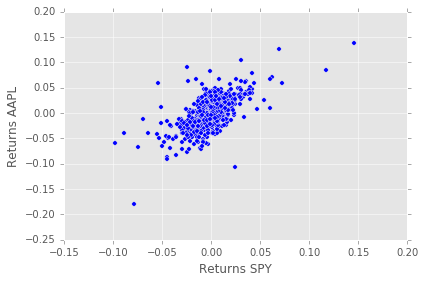

In [29]:
plt.scatter(dat_change["SPY"],dat_change["AAPL"])
plt.xlabel('Returns SPY')
plt.ylabel('Returns AAPL')
plt.tight_layout()

In [30]:
corr = dat_change.corr()
corr

,AAPL,AMZN,GLD,IWM,SPY,VXX
AAPL,1.000000,0.524897,-0.069097,0.619825,0.632558,-0.592792
AMZN,0.524897,1.000000,-0.017425,0.554623,0.566448,-0.385627
GLD,-0.069097,-0.017425,1.000000,0.025875,0.055497,-0.045662
IWM,0.619825,0.554623,0.025875,1.000000,0.919820,-0.778885
SPY,0.632558,0.566448,0.055497,0.919820,1.000000,-0.822362
VXX,-0.592792,-0.385627,-0.045662,-0.778885,-0.822362,1.000000


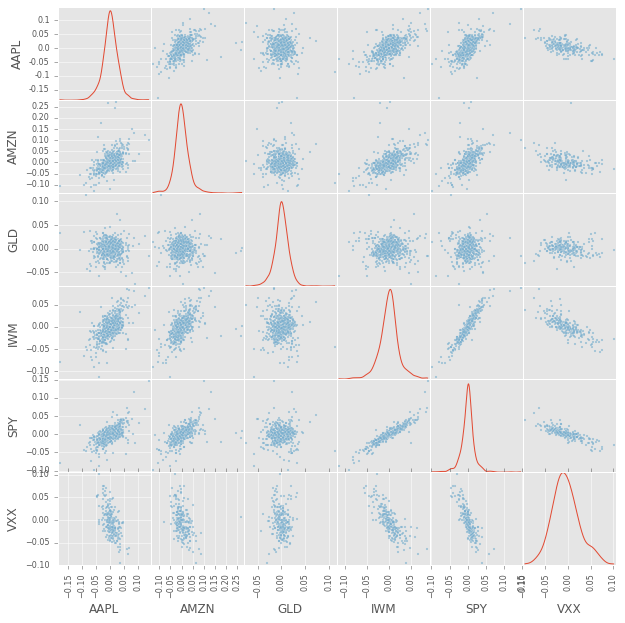

In [31]:
pd.scatter_matrix(dat_change, diagonal='kde',figsize=(10,10));

In [32]:
dat_change.skew()

AAPL   -0.223461
AMZN    1.726021
GLD     0.210842
IWM    -0.134951
SPY     0.397728
VXX     0.409351
dtype: float64

In [33]:
dat_change.kurt()

AAPL     3.854346
AMZN    11.746229
GLD      5.457343
IWM      3.006528
SPY      9.505700
VXX      0.579859
dtype: float64

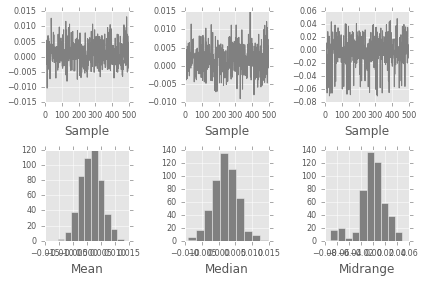

In [34]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(dat_change['AAPL'].dropna(), size=50, samples=500, color='grey')
plt.tight_layout()

## Merge

In [35]:
#https://www.quandl.com/data/SIDC/SUNSPOTS_D-Total-Sunspot-Numbers-Daily
sunspot = pd.read_csv("data/SIDC-SUNSPOTS_D.csv", index_col="Date")

In [36]:
sunspot.head()

,Daily Sunspot Number,Standard Deviation,Number of Observations,Indicator
Date,,,,
30/4/2016,89,7.4,24,0
29/4/2016,81,4.8,24,0
28/4/2016,90,5.6,32,0
27/4/2016,77,5.6,30,0
26/4/2016,57,4.9,33,0


In [37]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,86.289999,86.579999,81.899999,83.800002,309579900.0,11.019520
2007-01-04,84.050001,85.949998,83.820003,85.659998,211815100.0,11.264106
2007-01-05,85.770000,86.199997,84.400002,85.049997,208685400.0,11.183892
2007-01-08,85.959998,86.529998,85.280003,85.470000,199276700.0,11.239121
2007-01-09,86.450003,92.979999,85.150000,92.570003,837324600.0,12.172756


In [38]:
# Merge based on Index.
comb_data = pd.merge(aapl, sunspot, how="inner", left_index=True, right_index=True)

In [39]:
# Select portion of the data for analysis
comb_data = comb_data[["Adj Close", "Daily Sunspot Number"]]
# Rename columns
comb_data.columns = ["Close", "Sunspot"]

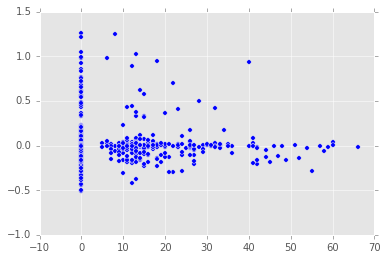

In [40]:
# Visual Check. 
plt.scatter(comb_data["Sunspot"], comb_data["Close"].pct_change())

No obvious relationships

In [41]:
comb_data["pct_change"] = comb_data["Close"].pct_change()
comb_data.dropna(inplace=True)
comb_data.head()

,Close,Sunspot,pct_change
2009-12-30,27.830205,18,0.004318
2009-12-29,27.496202,18,-0.012001
2009-12-28,27.826260,18,0.012004
2009-12-24,27.488311,20,-0.012145
2009-12-23,26.575717,26,-0.033199


In [42]:
from scipy import stats

In [43]:
x = comb_data["Sunspot"]

In [44]:
y = comb_data["pct_change"]

In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [46]:
print "r-squared:", r_value**2

r-squared: 0.00221072947387


With R-squared so low, there's no value in persuing this line of research

# Mean-Reversion and Optimization
Based on [Zura Kakushadze](http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2478345)'s paper titled **Mean-Reversion and Optimization**

Implementation of Equations 10 - 16

In [47]:
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 2, 4)

For education purpose, I have only implemented this on one market sector only (Auto Parts) and not against the whole market as Zura did in his paper.

In [48]:
data_list = ["DNZOF", "JCI", "DLPH", "TYIDF", "VLEEF", 
             "ALV", "LEA", "BWA","FURCF", "GNTX"]

In [49]:
df = web.DataReader(data_list, 'yahoo', start, end)

In [50]:
df

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 275 (major_axis) x 10 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2015-01-02 00:00:00 to 2016-02-04 00:00:00
Minor_axis axis: ALV to VLEEF

In [51]:
df = df[["Open","Close","Adj Close"], :, :]

In [52]:
df2 = df["Open"] / df["Close"].shift(1) - 1 

In [53]:
df2.head()

,ALV,BWA,DLPH,DNZOF,FURCF,GNTX,JCI,LEA,TYIDF,VLEEF
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.012271,-0.004384,-0.010607,-0.015005,0.0,-0.011154,-0.006875,-0.008682,0.000000,0.000000
2015-01-06,0.004009,0.003762,0.001297,-0.017410,0.0,0.003427,0.001943,0.004964,0.000000,0.000000
2015-01-07,0.002734,0.005115,0.005364,0.013289,0.0,0.009907,0.007864,0.013138,-0.030624,-0.040145
2015-01-08,-0.006749,0.009994,0.009636,0.000000,0.0,0.010901,0.008193,0.004800,0.000000,0.000000


In [54]:
# Calculate average
df2["average"] = df2.mean(axis=1)

In [55]:
df2.head()

,ALV,BWA,DLPH,DNZOF,FURCF,GNTX,JCI,LEA,TYIDF,VLEEF,average
Date,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.012271,-0.004384,-0.010607,-0.015005,0.0,-0.011154,-0.006875,-0.008682,0.000000,0.000000,-0.006898
2015-01-06,0.004009,0.003762,0.001297,-0.017410,0.0,0.003427,0.001943,0.004964,0.000000,0.000000,0.000199
2015-01-07,0.002734,0.005115,0.005364,0.013289,0.0,0.009907,0.007864,0.013138,-0.030624,-0.040145,-0.001336
2015-01-08,-0.006749,0.009994,0.009636,0.000000,0.0,0.010901,0.008193,0.004800,0.000000,0.000000,0.003678


In [56]:
# Deviation
df3 = df2.sub(df2["average"], axis=0)

In [57]:
df3.head()

,ALV,BWA,DLPH,DNZOF,FURCF,GNTX,JCI,LEA,TYIDF,VLEEF,average
Date,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.005373,0.002514,-0.003709,-0.008107,0.006898,-0.004256,0.000023,-0.001784,0.006898,0.006898,0.0
2015-01-06,0.003810,0.003563,0.001097,-0.017609,-0.000199,0.003227,0.001744,0.004764,-0.000199,-0.000199,0.0
2015-01-07,0.004070,0.006450,0.006700,0.014625,0.001336,0.011243,0.009200,0.014474,-0.029288,-0.038809,0.0
2015-01-08,-0.010427,0.006317,0.005959,-0.003678,-0.003678,0.007223,0.004516,0.001123,-0.003678,-0.003678,0.0


In [58]:
# Allocation
df4 = -df3
del df4["average"]

In [59]:
df5 = df["Close"] / df["Open"] - 1

In [60]:
# calculate returns
df6 = df5*df4

In [61]:
df4.head()

,ALV,BWA,DLPH,DNZOF,FURCF,GNTX,JCI,LEA,TYIDF,VLEEF
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.005373,-0.002514,0.003709,0.008107,-0.006898,0.004256,-0.000023,0.001784,-0.006898,-0.006898
2015-01-06,-0.003810,-0.003563,-0.001097,0.017609,0.000199,-0.003227,-0.001744,-0.004764,0.000199,0.000199
2015-01-07,-0.004070,-0.006450,-0.006700,-0.014625,-0.001336,-0.011243,-0.009200,-0.014474,0.029288,0.038809
2015-01-08,0.010427,-0.006317,-0.005959,0.003678,0.003678,-0.007223,-0.004516,-0.001123,0.003678,0.003678


In [62]:
# Total Returns
df7 = df6.sum(axis=1)
total_rtn = df6.sum(axis=1)
total_allot = df4.sum(axis=1)

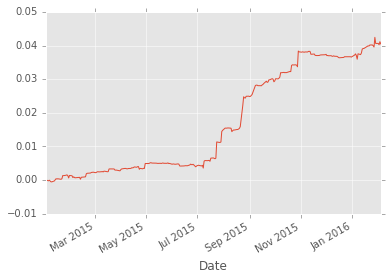

In [63]:
total_rtn.cumsum().plot()

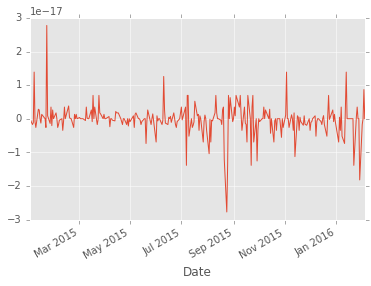

In [64]:
total_allot.plot()

In [65]:
print "Sharpe Ratio = " + str(np.sqrt(250)*total_rtn.mean()/total_rtn.std())


Sharpe Ratio = 3.13449224065


Note the leverage applied.

In [66]:
total_allot.describe()

count    2.750000e+02
mean    -2.195325e-19
std      4.603686e-18
min     -2.775558e-17
25%     -1.301043e-18
50%      0.000000e+00
75%      1.084202e-18
max      2.775558e-17
dtype: float64

**End of Lesson**